In [4]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt 
import os 
import cv2
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm, trange
import skimage
from skimage.transform import resize

In [5]:
#params
train_path = r'D:\18TCLC_NHAT\nam_4\ky_1\PBL4\Sign-language-prediction\gesturePrediction\train_data\asl_alphabet_train'
image_size = 64

In [6]:
label2class = {
}
for i in range(ord('A'), ord('Z')+1):
    label2class[chr(i)] = i - ord('A')
    label2class[i - ord('A')] = chr(i)
label2class['del'] = 26
label2class['nothing'] = 27
label2class['space'] = 28
label2class[26] = 'del'
label2class[27] = 'nothing'
label2class[28] = 'space'

def load_data(folder):
    X = [] # data
    y = [] # data lable
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28
            else: label = 29
                
            count = 100
            for image_fileName in tqdm(os.listdir(folder + '/' +folderName)):    
                img_file = cv2.imread(folder + "/" +folderName + '/' + image_fileName)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (image_size, image_size, 1))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
                    count -= 1
                    if count == 0: break
    X = np.asarray(X)
    y = np.asarray(y)

    return X, y
            


In [11]:
X_train, y_train = load_data(train_path)
print("X shape", X_train.shape)
print("y shape", y_train.shape)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

X shape (2900, 64, 64, 1)
y shape (2900,)


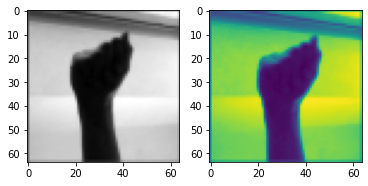

In [12]:
#display image
plt.subplot(1,2,1)
plt.imshow(X_train[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(X_train[1])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2) 

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 30)
y_testHot = to_categorical(y_test, num_classes = 30)


In [14]:
# Shuffle data to permit further subsampling
from sklearn.utils import shuffle
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
# X_train = X_train[:3000]
# X_test = X_test[:30000]
# y_trainHot = y_trainHot[:30000]
# y_testHot = y_testHot[:30000]
print(X_train.shape, y_trainHot.shape)
print(X_test.shape, y_testHot.shape)

(2320, 64, 64, 1) (2320, 30)
(580, 64, 64, 1) (580, 30)


In [15]:
from sklearn.metrics import confusion_matrix
import itertools
#import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator as tf
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
# dimension of (64,64,1) is 3 because kernel requires 3 dimensions. Number "1" shows that it is used as gray scale. kernel_size means that dimension of filter. 
model = Sequential()
#
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(30, activation = "softmax"))

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        8

In [17]:
# Define the optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [18]:
# Compile the model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(X_train,y_trainHot,epochs=10,validation_data=(X_test,y_testHot))

Epoch 1/10
73/73 [==============================] - 15s 200ms/step - loss: 3.3949 - accuracy: 0.0254 - val_loss: 3.3827 - val_accuracy: 0.0328
Epoch 2/10
73/73 [==============================] - 16s 217ms/step - loss: 3.3626 - accuracy: 0.0500 - val_loss: 3.3193 - val_accuracy: 0.1345
Epoch 3/10
73/73 [==============================] - 15s 205ms/step - loss: 2.9346 - accuracy: 0.1509 - val_loss: 2.2537 - val_accuracy: 0.3552
Epoch 4/10
73/73 [==============================] - 15s 211ms/step - loss: 2.0211 - accuracy: 0.3806 - val_loss: 1.5279 - val_accuracy: 0.5672
Epoch 5/10
73/73 [==============================] - 15s 205ms/step - loss: 1.4302 - accuracy: 0.5591 - val_loss: 1.0859 - val_accuracy: 0.7138
Epoch 6/10
73/73 [==============================] - 15s 210ms/step - loss: 1.0900 - accuracy: 0.6552 - val_loss: 0.8289 - val_accuracy: 0.7672
Epoch 7/10
73/73 [==============================] - 15s 209ms/step - loss: 0.7744 - accuracy: 0.7677 - val_loss: 0.6506 - val_accuracy: 0.8259

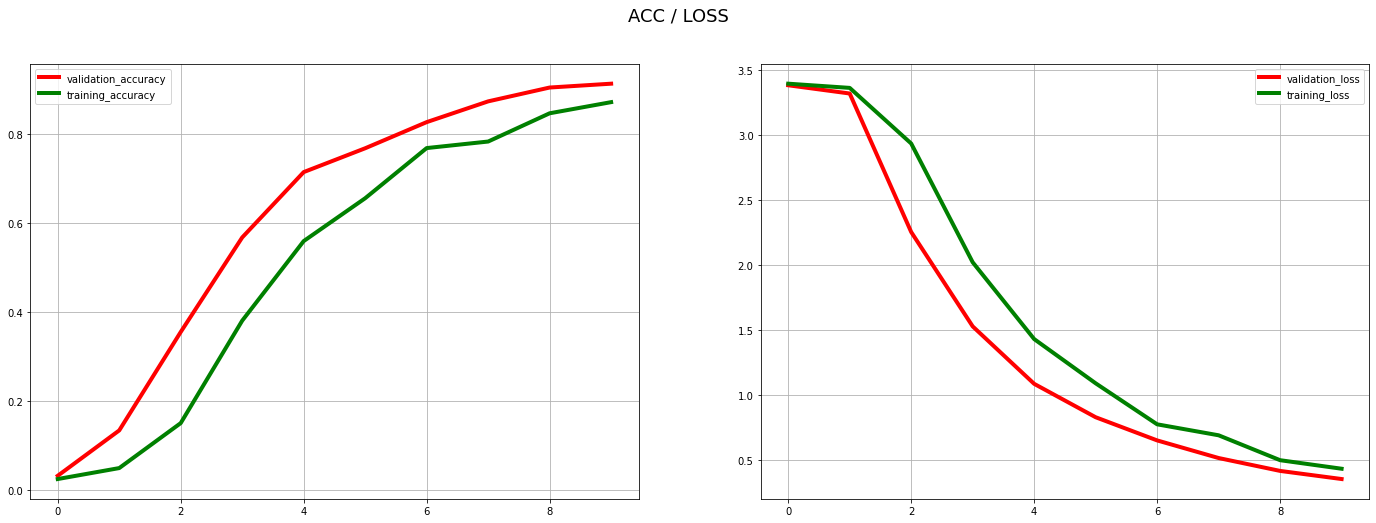

In [20]:
#Evaluate 
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(history.history["accuracy"], label="training_accuracy", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

In [21]:
print('Train accuracy of the model: ',history.history['accuracy'][-1])
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])

Train accuracy of the model:  0.8706896305084229
Train loss of the model:  0.4327196776866913
Validation accuracy of the model:  0.9120689630508423
Validation loss of the model:  0.35349202156066895


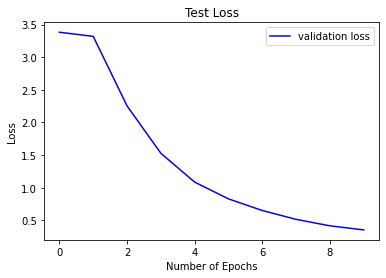

In [22]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [23]:
test_path = r'D:\18TCLC_NHAT\nam_4\ky_1\PBL4\Sign-language-prediction\gesturePrediction\test_data\asl_alphabet_test'
test_list = os.listdir(test_path)

(1, 64, 64, 1)
I guess : 11 x =  A_test.jpg


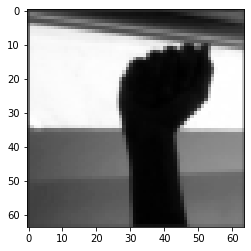

(1, 64, 64, 1)
I guess : 1 x =  B_test.jpg


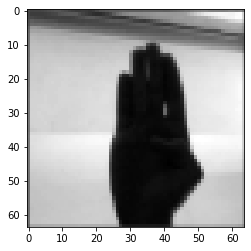

(1, 64, 64, 1)
I guess : 0 x =  C_test.jpg


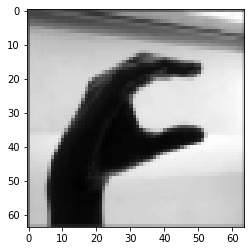

(1, 64, 64, 1)
I guess : 3 x =  D_test.jpg


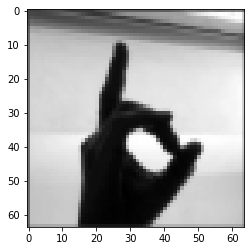

(1, 64, 64, 1)
I guess : 4 x =  E_test.jpg


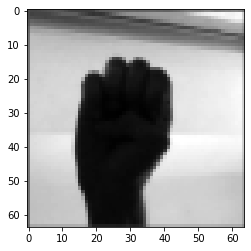

(1, 64, 64, 1)
I guess : 5 x =  F_test.jpg


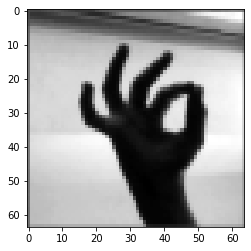

(1, 64, 64, 1)
I guess : 6 x =  G_test.jpg


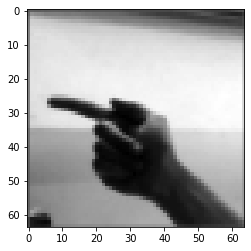

(1, 64, 64, 1)
I guess : 7 x =  H_test.jpg


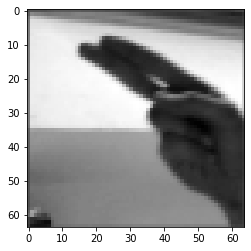

(1, 64, 64, 1)
I guess : 10 x =  I_test.jpg


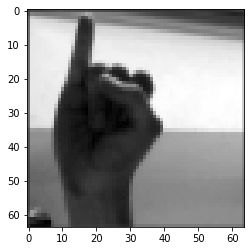

(1, 64, 64, 1)
I guess : 26 x =  J_test.jpg


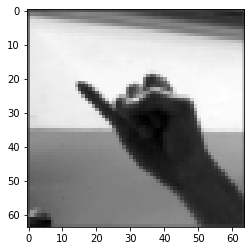

(1, 64, 64, 1)
I guess : 22 x =  K_test.jpg


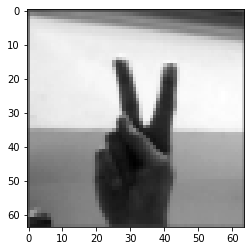

(1, 64, 64, 1)
I guess : 11 x =  L_test.jpg


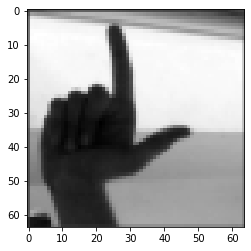

(1, 64, 64, 1)
I guess : 12 x =  M_test.jpg


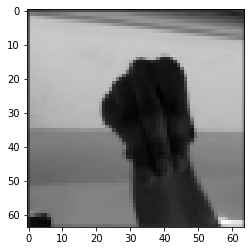

(1, 64, 64, 1)
I guess : 27 x =  nothing_test.jpg


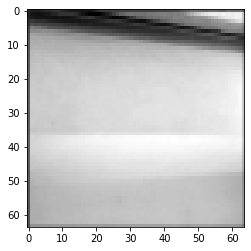

(1, 64, 64, 1)
I guess : 13 x =  N_test.jpg


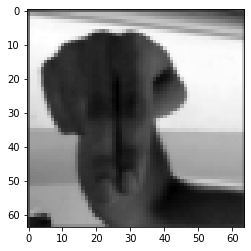

(1, 64, 64, 1)
I guess : 14 x =  O_test.jpg


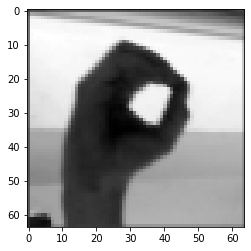

(1, 64, 64, 1)
I guess : 15 x =  P_test.jpg


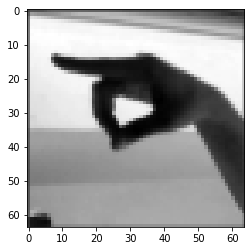

(1, 64, 64, 1)
I guess : 16 x =  Q_test.jpg


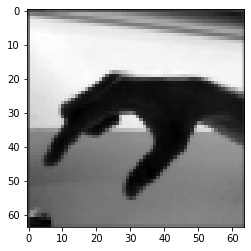

(1, 64, 64, 1)
I guess : 20 x =  R_test.jpg


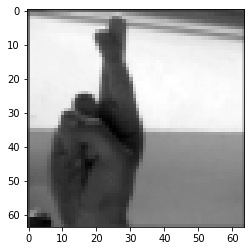

(1, 64, 64, 1)
I guess : 28 x =  space_test.jpg


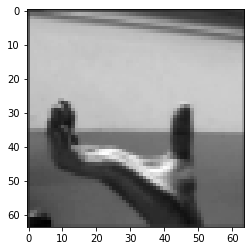

(1, 64, 64, 1)
I guess : 18 x =  S_test.jpg


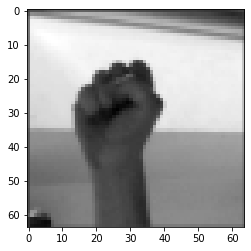

(1, 64, 64, 1)
I guess : 18 x =  T_test.jpg


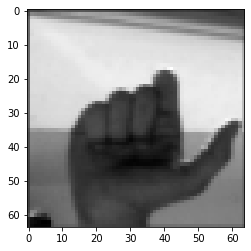

(1, 64, 64, 1)
I guess : 10 x =  U_test.jpg


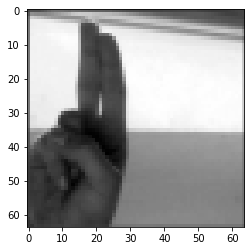

(1, 64, 64, 1)
I guess : 10 x =  V_test.jpg


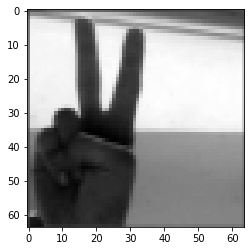

(1, 64, 64, 1)
I guess : 22 x =  W_test.jpg


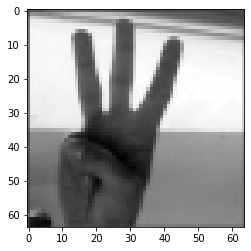

(1, 64, 64, 1)
I guess : 23 x =  X_test.jpg


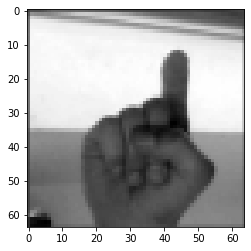

(1, 64, 64, 1)
I guess : 24 x =  Y_test.jpg


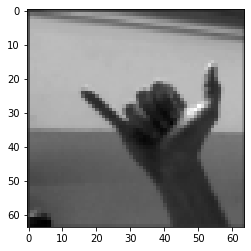

(1, 64, 64, 1)
I guess : 11 x =  Z_test.jpg


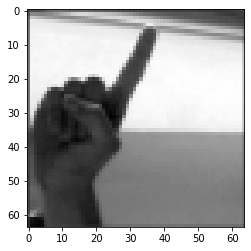

In [33]:
for x in test_list:
    img = cv2.imread(test_path +'/'+x)
    img_file = skimage.transform.resize(img, (image_size, image_size, 1))
    img_arr = np.asarray(img_file)
    img_arr = img_arr.reshape(1, 64, 64, 1)
    prediction = model.predict(img_arr)
    print(f"I guess : {np.argmax(prediction)}", 'x = ', x)    
    img_rgb = plt.imread(test_path+'/'+x)
    plt.imshow(img_file, cmap='gray')
    plt.show()

In [45]:
import pickle
# save the model to disk
model1 = 'SL_prediction_model1.pkl'
with open(model1, 'wb') as file:  
    pickle.dump(model, file)

TypeError: can't pickle _thread.RLock objects